In [1]:
import pandas as pd

structure_data = pd.read_csv('./school/dynamikfaktor_version2.csv')
structure_data

,v,d,m,c,r,p_theorie,p_messwert,zufallzahl_0_1,zufallzahl_m1_1
0,4,0.030,0,0,0,1.123,1.140,0.648,0.296
1,4,0.028,0,0,0,1.127,1.127,0.498,-0.005
2,4,0.026,0,0,0,1.132,1.210,0.843,0.686
3,4,0.024,0,0,0,1.137,1.168,0.636,0.272
4,4,0.022,0,0,0,1.144,1.086,0.247,-0.507
...,...,...,...,...,...,...,...,...,...
155,24,0.030,0,0,1,1.737,1.597,0.097,-0.805
156,24,0.028,0,0,1,1.763,1.639,0.147,-0.707
157,24,0.026,0,0,1,1.792,1.852,0.667,0.334
158,24,0.024,0,0,1,1.824,1.824,0.500,-0.001


In [2]:
structure_data['d'].value_counts()

d
0.030    32
0.028    32
0.026    32
0.024    32
0.022    32
Name: count, dtype: int64

In [3]:
structure_data_shuffled_df = structure_data.sample(n=len(structure_data), random_state=1)
structure_data_shuffled_df

,v,d,m,c,r,p_theorie,p_messwert,zufallzahl_0_1,zufallzahl_m1_1
29,8,0.022,0,0,1,1.287,1.389,0.897,0.793
42,4,0.026,0,0,0,1.132,1.116,0.429,-0.142
14,12,0.022,0,0,0,1.431,1.414,0.442,-0.117
91,12,0.028,0,0,0,1.382,1.396,0.551,0.103
81,4,0.028,0,0,0,1.127,1.215,0.890,0.780
...,...,...,...,...,...,...,...,...,...
133,12,0.024,0,0,0,1.412,1.432,0.569,0.139
137,24,0.026,0,0,0,1.792,1.696,0.233,-0.535
72,12,0.026,0,0,1,1.396,1.407,0.538,0.076
140,4,0.030,0,0,1,1.123,1.120,0.488,-0.024


In [4]:
pd.get_dummies(structure_data_shuffled_df['d']).head()

,0.022,0.024,0.026,0.028,0.030
29,True,False,False,False,False
42,False,False,True,False,False
14,True,False,False,False,False
91,False,False,False,True,False
81,False,False,False,True,False


In [5]:
# get the data without the result
structure_data_shuffled = structure_data_shuffled_df.to_numpy()
structure_data_x_data = (structure_data_shuffled_df.drop(['p_theorie','p_messwert',	'zufallzahl_0_1', 'zufallzahl_m1_1'], axis=1)).to_numpy()
structure_data_y_data = (structure_data_shuffled_df['p_theorie']).to_numpy()
structure_data_y_messwert_data = (structure_data_shuffled_df['p_messwert']).to_numpy()
structure_data_x_data
structure_data_y_data

array([1.287, 1.132, 1.431, 1.382, 1.127, 1.861, 1.144, 1.382, 1.123,
       1.792, 1.287, 1.431, 1.412, 1.246, 1.861, 1.369, 1.254, 1.431,
       1.275, 1.123, 1.431, 1.737, 1.382, 1.246, 1.144, 1.382, 1.763,
       1.246, 1.137, 1.412, 1.264, 1.137, 1.382, 1.382, 1.824, 1.132,
       1.264, 1.287, 1.412, 1.763, 1.396, 1.369, 1.254, 1.737, 1.396,
       1.431, 1.737, 1.275, 1.412, 1.792, 1.763, 1.792, 1.792, 1.824,
       1.412, 1.824, 1.824, 1.275, 1.396, 1.144, 1.246, 1.127, 1.861,
       1.763, 1.254, 1.275, 1.396, 1.264, 1.132, 1.132, 1.137, 1.396,
       1.254, 1.123, 1.861, 1.246, 1.737, 1.246, 1.275, 1.254, 1.132,
       1.431, 1.246, 1.861, 1.264, 1.737, 1.369, 1.431, 1.396, 1.369,
       1.824, 1.137, 1.123, 1.861, 1.264, 1.137, 1.264, 1.287, 1.737,
       1.144, 1.763, 1.824, 1.264, 1.824, 1.287, 1.824, 1.144, 1.737,
       1.132, 1.127, 1.287, 1.123, 1.396, 1.254, 1.763, 1.137, 1.412,
       1.144, 1.412, 1.144, 1.369, 1.287, 1.127, 1.369, 1.137, 1.382,
       1.369, 1.792,

In [6]:
#split the data into test, trin and validation data
X_train, y_train = structure_data_x_data[:120], structure_data_y_data[:120] 
X_val, y_val = structure_data_x_data[120:], structure_data_y_data[120:] 
X_train_messwert, y_train_messwert = structure_data_x_data[:120], structure_data_y_messwert_data[:120] 
X_val_messwert, y_val_messwert = structure_data_x_data[:120], structure_data_y_messwert_data[120:] 
columns_count = len(X_train[0])

X_train.shape, y_train.shape, X_val.shape, y_val.shape , type(X_train)

((120, 5), (120,), (40, 5), (40,), numpy.ndarray)

In [7]:
# preprocessing with standard deviation to normalise data
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as pyplot

scaler = StandardScaler().fit(X_train)

def preprocessor(X):
  A = np.copy(X)
  A = scaler.transform(A)
  return A

# X_train = preprocessor(X_train)
X_train, X_val = preprocessor(X_train), preprocessor(X_val)
X_train_messwert, X_val_messwert = preprocessor(X_train_messwert), preprocessor(X_val_messwert)

X_train

array([[-0.57188466, -1.343831  ,  0.        ,  0.        ,  1.06904497],
       [-1.10802652,  0.06455083,  0.        ,  0.        , -0.93541435],
       [-0.03574279, -1.343831  ,  0.        ,  0.        , -0.93541435],
       [-0.03574279,  0.76874175,  0.        ,  0.        , -0.93541435],
       [-1.10802652,  0.76874175,  0.        ,  0.        , -0.93541435],
       [ 1.5726828 , -1.343831  ,  0.        ,  0.        , -0.93541435],
       [-1.10802652, -1.343831  ,  0.        ,  0.        , -0.93541435],
       [-0.03574279,  0.76874175,  0.        ,  0.        , -0.93541435],
       [-1.10802652,  1.47293266,  0.        ,  0.        , -0.93541435],
       [ 1.5726828 ,  0.06455083,  0.        ,  0.        , -0.93541435],
       [-0.57188466, -1.343831  ,  0.        ,  0.        , -0.93541435],
       [-0.03574279, -1.343831  ,  0.        ,  0.        , -0.93541435],
       [-0.03574279, -0.63964008,  0.        ,  0.        ,  1.06904497],
       [-0.57188466,  1.47293266,  0. 

In [8]:
X_train.shape, X_val.shape

((120, 5), (40, 5))

In [9]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse

#create a new array that contains every columns in xdata, ydata, and pred
def merge_data(X_data, Y_data, Y_data_prediction):
    index =0
    result = []
    for element in Y_data:
        new_data =[]
        for i in range(columns_count):
            new_data.append( X_data[index, i])
        new_data.append('ans=')
        new_data.append(Y_data[index])
        new_data.append('pred=')
        new_data.append(Y_data_prediction[index])
        result.append(new_data)
        index+=1
    return result


def visualise(X_train, X_val, y_val, y_train_pred, y_val_pred):
    #visualisation
    X_visual=X_val
    Y_visual=y_val
    Y_visual_pred =y_val_pred
    pyplot.scatter(X_visual[:, 1], Y_visual, c="red")
    pyplot.scatter(X_visual[:, 1], Y_visual_pred, c="blue")
    lsit = merge_data(X_visual,Y_visual, Y_visual_pred)
    print(pd.DataFrame(lsit))
    print("\nRMSE:", 'train:', rmse(y_train_pred, y_train), ', valid:', rmse(y_val_pred, y_val))


In [10]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.571885,-1.343831,0.0,0.0,1.069045
1,-1.108027,0.064551,0.0,0.0,-0.935414
2,-0.035743,-1.343831,0.0,0.0,-0.935414
3,-0.035743,0.768742,0.0,0.0,-0.935414
4,-1.108027,0.768742,0.0,0.0,-0.935414


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

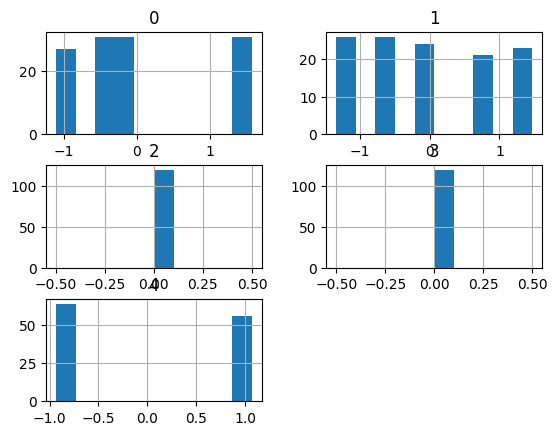

In [11]:
pd.DataFrame(X_train).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

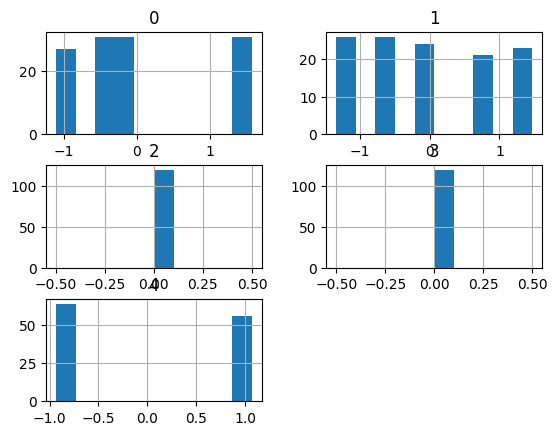

In [12]:
(pd.DataFrame(X_train_messwert)).hist()

In [13]:
X_train.shape, y_train.shape

((120, 5), (120,))

       0      1    2    3    4     5      6      7         8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  4.381546
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=  3.390646
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=  2.398054
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  4.381546
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=  2.398832
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=  4.381592
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  4.381546
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  7.356944
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  2.398741
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=  7.356853
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  3.390601
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=  2.398008
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  3.390601
13   4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  2.398741
14  24.0  0.026  0.0  0.0  0.0  ans=  1.792  pred=  7.357631
15   4.0  0.026  0.0  0.

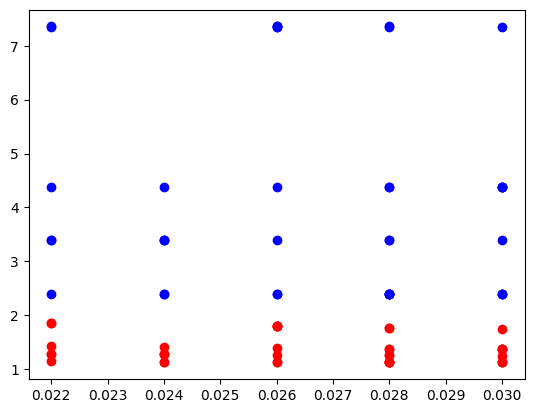

In [14]:
# try to train with different training models
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
#prediction
y_train_pred=lm.predict(X_train)
y_val_pred=lm.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)


       0      1    2    3    4     5      6      7      8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.803
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=  1.799
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=  1.803
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.803
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=  1.799
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=  1.803
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.803
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  1.803
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.799
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=  1.803
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.799
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=  1.803
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.799
13   4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.799
14  24.0  0.026  0.0  0.0  0.0  ans=  1.792  pred=  1.799
15   4.0  0.026  0.0  0.0  1.0  ans=  1.132  pred=  1.803
16   4.0  0.02

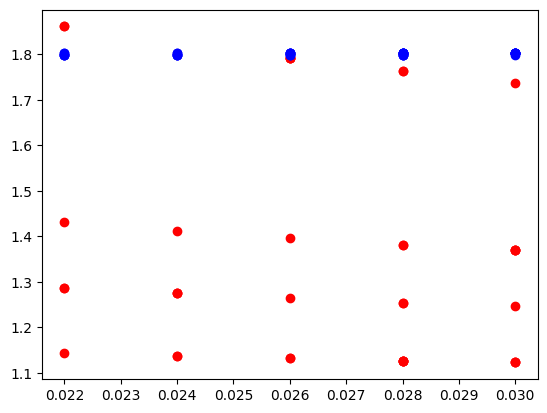

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
#prediction
y_train_pred=knn.predict(X_train)
y_val_pred=knn.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)


       0      1    2    3    4     5      6      7         8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.792707
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=  1.792736
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=  1.792707
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.792707
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=  1.792736
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=  1.792707
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.792707
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  1.792707
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.792736
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=  1.792707
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.792736
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=  1.792707
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.792736
13   4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.792736
14  24.0  0.026  0.0  0.0  0.0  ans=  1.792  pred=  1.792736
15   4.0  0.026  0.0  0.

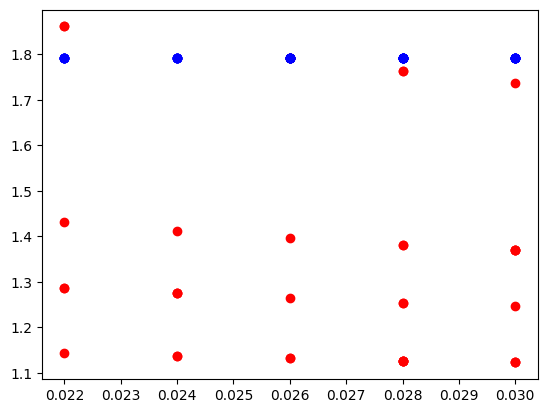

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10, n_estimators=1000).fit(X_train, y_train)
#prediction
y_train_pred=rfr.predict(X_train)
y_val_pred=rfr.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)


       0      1    2    3    4     5      6      7        8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.65739
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=  1.65739
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=  1.65739
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.65739
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=  1.65739
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=  1.65739
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=  1.65739
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  1.65739
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.65739
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=  1.65739
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.65739
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=  1.65739
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=  1.65739
13   4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  1.65739
14  24.0  0.026  0.0  0.0  0.0  ans=  1.792  pred=  1.65739
15   4.0  0.026  0.0  0.0  1.0  ans=  1.

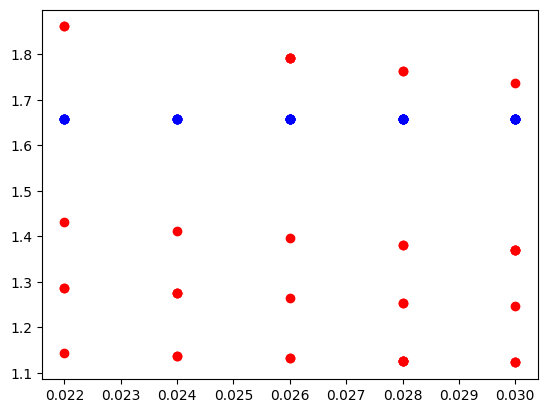

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)
#prediction
y_train_pred=gbr.predict(X_train)
y_val_pred=gbr.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((columns_count,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/models-2/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 2.1659 - root_mean_squared_error: 1.4676 - val_loss: 0.2526 - val_root_mean_squared_error: 0.5026
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7461 - root_mean_squared_error: 0.8617 - val_loss: 25.6297 - val_root_mean_squared_error: 5.0626
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2618 - root_mean_squared_error: 0.5099 - val_loss: 26.7510 - val_root_mean_squared_error: 5.1721
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0645 - root_mean_squared_error: 0.2530 - val_loss: 14.8329 - val_root_mean_squared_error: 3.8513
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1120 - val_loss: 7.9176 - val_root_mean_squared_error: 2.8138
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0078 - root_mean_squared_error: 0.0879 - val_loss: 4.7877 - val_root_mean_squared_error: 2.1881
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
       0      1    2    3    4     5      6      7             8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [0.9789764]
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=   [0.9899412]
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=    [1.044929]
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [0.9789764]
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=   [1.0261732]
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=  [0.97680587]
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [0.9789764]
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  [0.87245053]
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=   [1.0305139]
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=   [0.8767907]
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [0.9921115]
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=   [1.0470995]
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [0.9921115]
13   4.0  0.02

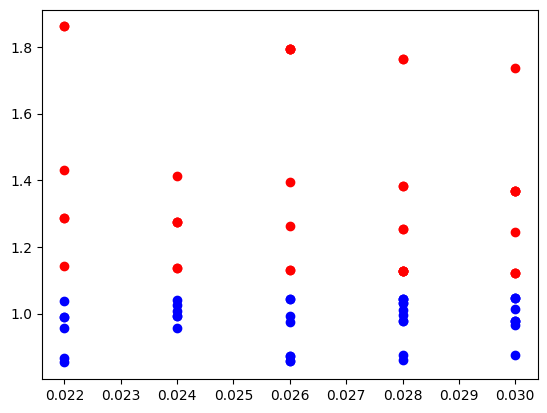

In [19]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/models-2/simple_nn.keras')
#prediction
y_train_pred=simple_nn.predict(X_train)
y_val_pred=simple_nn.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)

In [20]:
medium_nn = Sequential()
medium_nn.add(InputLayer((columns_count,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/models-2/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 1.5310 - root_mean_squared_error: 1.2252 - val_loss: 132.3965 - val_root_mean_squared_error: 11.5064
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3054 - root_mean_squared_error: 0.5521 - val_loss: 117.2817 - val_root_mean_squared_error: 10.8297
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0997 - root_mean_squared_error: 0.3151 - val_loss: 74.1516 - val_root_mean_squared_error: 8.6111
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0625 - root_mean_squared_error: 0.2494 - val_loss: 38.3538 - val_root_mean_squared_error: 6.1930
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 71.1007 - val_root_mean_squared_error: 8.4321
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 72.9263 - val_root_mean_squared_error: 8.5397
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       0      1    2    3    4     5      6      7            8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [6.178622]
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=  [4.3636236]
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=   [2.715987]
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [6.178622]
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=  [2.6471572]
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=   [6.178845]
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [6.178622]
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=  [11.474651]
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=  [2.6468487]
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=  [11.473729]
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [4.363363]
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=  [2.7158327]
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [4.363363]
13   4.0  0.028  0.0  0.0  0

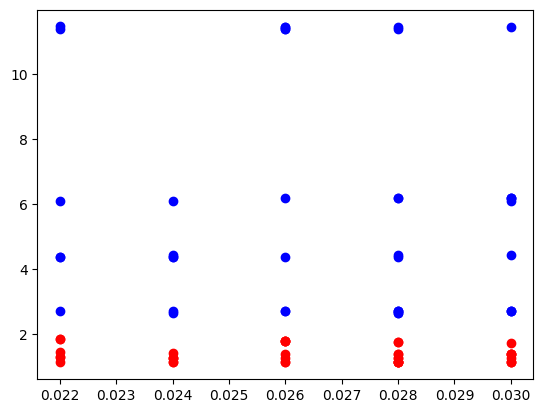

In [21]:
medium_nn = load_model('models/models-2/medium_nn.keras')
#prediction
y_train_pred=medium_nn.predict(X_train)
y_val_pred=medium_nn.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)

In [22]:
large_nn = Sequential()
large_nn.add(InputLayer((columns_count,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/models-2/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 20856.4863 - root_mean_squared_error: 128.2845 - val_loss: 12.1900 - val_root_mean_squared_error: 3.4914
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.0144 - root_mean_squared_error: 1.4193 - val_loss: 6.7510 - val_root_mean_squared_error: 2.5983
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1308 - root_mean_squared_error: 1.0609 - val_loss: 0.4499 - val_root_mean_squared_error: 0.6708
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9290 - root_mean_squared_error: 0.9546 - val_loss: 392.8018 - val_root_mean_squared_error: 19.8192
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4265 - root_mean_squared_error: 0.6522 - val_loss: 531.6427 - val_root_mean_squared_error: 23.0574
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2002 - root_mean_squared_error: 1.9072 - val_loss: 967.9547 - val_root_mean_squared_error: 31.1120
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/ste

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021BFD1725C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       0      1    2    3    4     5      6      7             8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [1.3263462]
1    8.0  0.022  0.0  0.0  0.0

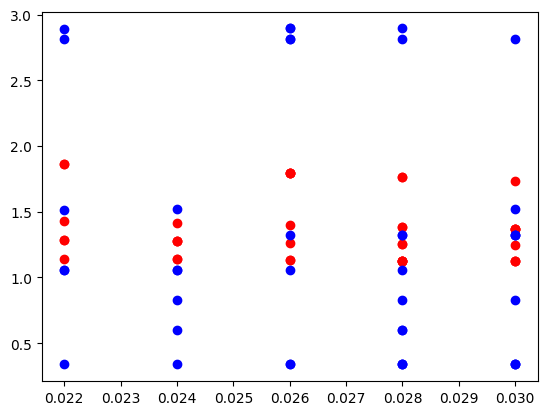

In [23]:
large_nn = load_model('models/models-2/large_nn.keras')
#prediction
y_train_pred=large_nn.predict(X_train)
y_val_pred=large_nn.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)

In [24]:
larger_nn = Sequential()
larger_nn.add(InputLayer((columns_count,)))
larger_nn.add(Dense(256, 'relu'))
larger_nn.add(Dense(128, 'relu'))
larger_nn.add(Dense(64, 'relu'))
larger_nn.add(Dense(32, 'relu'))
larger_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/models-2/larger_nn.keras', save_best_only=True)
larger_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
larger_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 2762.7417 - root_mean_squared_error: 46.8746 - val_loss: 377.6396 - val_root_mean_squared_error: 19.4330
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8689 - root_mean_squared_error: 0.9316 - val_loss: 392.4303 - val_root_mean_squared_error: 19.8099
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5434 - root_mean_squared_error: 0.7368 - val_loss: 155.2867 - val_root_mean_squared_error: 12.4614
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5515 - root_mean_squared_error: 0.7277 - val_loss: 38.5071 - val_root_mean_squared_error: 6.2054
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1311 - root_mean_squared_error: 0.3618 - val_loss: 155.9485 - val_root_mean_squared_error: 12.4879
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2821 - root_mean_squared_error: 0.5308 - val_loss: 185.5108 - val_root_mean_squared_error: 13.6202
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       0      1    2    3    4     5      6      7             8
0   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [1.3263462]
1    8.0  0.022  0.0  0.0  0.0  ans=  1.287  pred=   [1.0597575]
2    4.0  0.028  0.0  0.0  1.0  ans=  1.127  pred=   [0.3380137]
3   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [1.3263462]
4    4.0  0.024  0.0  0.0  0.0  ans=  1.137  pred=   [0.6025396]
5   12.0  0.028  0.0  0.0  1.0  ans=  1.382  pred=   [1.3263285]
6   12.0  0.030  0.0  0.0  1.0  ans=  1.369  pred=   [1.3263462]
7   24.0  0.026  0.0  0.0  1.0  ans=  1.792  pred=   [2.8113506]
8    4.0  0.028  0.0  0.0  0.0  ans=  1.127  pred=   [0.6031541]
9   24.0  0.030  0.0  0.0  1.0  ans=  1.737  pred=    [2.811381]
10   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [1.0600636]
11   4.0  0.030  0.0  0.0  1.0  ans=  1.123  pred=   [0.3380199]
12   8.0  0.024  0.0  0.0  0.0  ans=  1.275  pred=   [1.0600636]
13   4.0  0.02

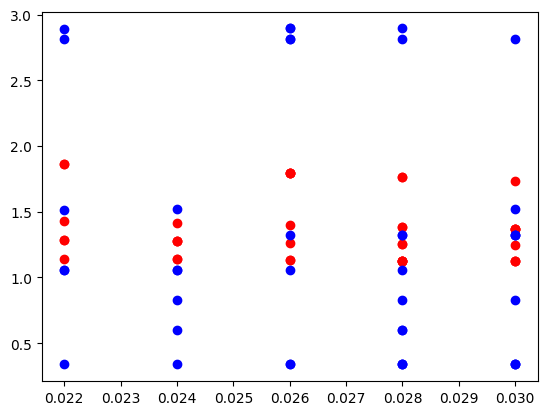

In [25]:
larger_nn = load_model('models/models-2/large_nn.keras')
#prediction
y_train_pred=larger_nn.predict(X_train)
y_val_pred=larger_nn.predict(X_val)

#visualisation
visualise(X_train, X_val, y_val, y_train_pred, y_val_pred)